<a href="https://colab.research.google.com/github/Ritesh1126/Deep-Learning/blob/main/SPEECH%20EMOTION%20RECOGNITION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPEECH EMOTION RECOGNITION**

In [74]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Setting Dataset Path**

In [75]:
data_path = '/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24'






In [76]:
import os
print(os.listdir('/content/drive/MyDrive'))


['7. ACADEMIC CALENDAR 2nd Sem EVEN TERM 2022-23_V-1.00.pdf', '2 Time Table_Section_K_SEM-I.pdf', '5. HELP FILE_MOBILE PHONE.pdf', '3. FYC Name of Class Teacher details.pdf', '6. ODD TERM 2022-23_ACADEMIC CALENDAR 1st Sem _V-1.00.pdf', '4. HELP FILE_LAPTOP OR DESKTOP COMPUTER.pdf', 'IMG-20230912-WA0002.jpg', 'Untitled document.gdoc', 'p3.gdoc', 'adhar.jpg', 'Colab Notebooks', 'Google AI Studio', 'Oracle_eCertificate.pdf', 'Document from Mr.Roman_07🥰.pdf', 'Document from Mr.Roman_07🥰', 'Synopsis_01.gdoc', 'Ritesh Sontakke Resume Official (1).pdf', 'Ritesh Sontakke Resume Official.pdf', 'RITESH SAINATH SONTAKKE (1) (1).png', 'RITESH SAINATH SONTAKKE (1).png', 'RAVDESS']


In [77]:
print(os.listdir('/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24'))


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_10', 'Actor_09', 'Actor_13', 'Actor_11', 'Actor_15', 'Actor_14', 'Actor_16', 'Actor_12', 'Actor_20', 'Actor_17', 'Actor_19', 'Actor_18', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


**3. Install Required Libraries**

In [78]:
!pip install librosa soundfile numpy pandas scikit-learn tensorflow keras tqdm


**4. Import Libraries**

In [79]:
import os
import librosa
import soundfile
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


**5. Define Emotion Labels and Feature Extraction**

In [80]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

def extract_features(file_path):
    data, sample_rate = soundfile.read(file_path)
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled


**6. Extract Features from Audio Files**

In [81]:
# DATA PREPROCESSING PHASES

# Explicitly set data_path to ensure correct path is used
data_path = '/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24'

# List all audio files and extract emotion labels
file_path_list = []
emotion_list = []

print(f"Data path being used: {data_path}") # Add this line to check the path

for actor_folder in os.listdir(data_path):
    actor_path = os.path.join(data_path, actor_folder)
    if os.path.isdir(actor_path):
        for file_name in os.listdir(actor_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(actor_path, file_name)
                # Extract emotion label from file name (e.g., '03-01-06-01-01-01-16.wav' -> '06')
                emotion_code = file_name.split('-')[2]
                if emotion_code in emotions:
                    file_path_list.append(file_path)
                    emotion_list.append(emotions[emotion_code])

# Extract features and create DataFrame
features_list = []
for file_path in tqdm(file_path_list, desc="Extracting features"):
    features = extract_features(file_path)
    features_list.append(features)

df = pd.DataFrame({'features': features_list, 'emotion': emotion_list})

print("✅ Feature extraction complete!")
print("DataFrame head:")
display(df.head())

Data path being used: /content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24


Extracting features:   0%|          | 3/1440 [00:00<00:52, 27.57it/s]/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2
  warnings.warn(
Extracting features: 100%|██████████| 1440/1440 [02:41<00:00,  8.91it/s]

✅ Feature extraction complete!
DataFrame head:


,features,emotion
0,"[-724.8057884330893, 83.05964077692961, 0.8636...",calm
1,"[-733.9896433820609, 82.99156809175591, 3.7967...",calm
2,"[-759.9216668304908, 75.78351733853746, 6.0236...",calm
3,"[-735.9587635905602, 83.71624940734971, 8.7207...",calm
4,"[-726.2172740771341, 68.54141568601537, 3.2933...",neutral


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# X and y are expected to be created and processed in a previous cell (e.g., 4EXbjAgThbYB)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data ready!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

✅ Data ready!
Train shape: (1148, 40)
Test shape: (287, 40)


### Playing an Audio File

In [84]:
import IPython.display as ipd

# Play the test audio file
test_file = "/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-05-01-01-01-01.wav"
ipd.Audio(test_file)

### Record Your Voice and Predict Emotion

In [85]:
from google.colab import output
from IPython.display import Javascript
import soundfile as sf
import base64
import numpy as np # Import numpy for audio data handling

# JavaScript to record audio and return as base64
RECORD_AUDIO_JAVASCRIPT = """
const recordAudio = () => new Promise(async resolve => {
    const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
    const mediaRecorder = new MediaRecorder(stream);
    const audioChunks = [];

    mediaRecorder.addEventListener('dataavailable', event => {
        audioChunks.push(event.data);
    });

    mediaRecorder.addEventListener('stop', () => {
        const audioBlob = new Blob(audioChunks);
        const reader = new FileReader();
        reader.readAsDataURL(audioBlob);
        reader.onloadend = () => {
            const base64data = reader.result.split(',')[1];
            resolve(base64data);
        };
    });

    mediaRecorder.start();
    console.log('Recording...');

    // Stop recording after 5 seconds (adjust as needed)
    setTimeout(() => {
        mediaRecorder.stop();
        console.log('Recording stopped.');
    }, 5000);
});

recordAudio(); // Call the function, the promise will resolve with base64 data
"""

def record_and_predict():
    print("🎤 Recording your voice for 5 seconds...")
    # Execute JavaScript and get the base64 audio data
    base64_audio = output.eval_js(RECORD_AUDIO_JAVASCRIPT)

    audio_data = base64.b64decode(base64_audio)
    # Save the recorded audio to a file
    with open("recorded_audio.wav", "wb") as f:
        f.write(audio_data)

    print("✅ Audio recorded and saved as recorded_audio.wav")

    # Load saved model, scaler, and label encoder
    try:
        model = joblib.load("speech_emotion_model.pkl")
        scaler = joblib.load("scaler.pkl")
        le = joblib.load("label_encoder.pkl")
    except FileNotFoundError:
        print("❌ Error: Model, scaler, or label encoder file not found. Please ensure they are saved.")
        return

    # Extract features from the recorded audio
    try:
        features = extract_features_from_file("recorded_audio.wav")
        features = scaler.transform([features])  # scale features
    except Exception as e:
        print(f"❌ Error extracting features: {e}")
        return


    # Predict
    prediction = model.predict(features)
    emotion = le.inverse_transform(prediction)[0]

    print(f"🎧 The predicted emotion for your recording is: **{emotion.upper()}**")

# Call the function to start recording and prediction
record_and_predict()

🎤 Recording your voice for 5 seconds...
✅ Audio recorded and saved as recorded_audio.wav


/tmp/ipython-input-1052529250.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=3, offset=0.5)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


🎧 The predicted emotion for your recording is: **FEARFUL**


**7. Build the Neural Network Model**

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(40,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,168 (203.78 KB)

 Trainable params: 52,168 (203.78 KB)

 Non-trainable params: 0 (0.00 B)

**TRAIN THE MODEL**

In [87]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1481 - loss: 2.0743 - val_accuracy: 0.2648 - val_loss: 1.8908
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2810 - loss: 1.8291 - val_accuracy: 0.3554 - val_loss: 1.7480
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3772 - loss: 1.6693 - val_accuracy: 0.4007 - val_loss: 1.6055
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4244 - loss: 1.5626 - val_accuracy: 0.4077 - val_loss: 1.5452
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4619 - loss: 1.4615 - val_accuracy: 0.4181 - val_loss: 1.4675
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5318 - loss: 1.3090 - val_accuracy: 0.4564 - val_loss: 1.3886
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5510 - loss: 1.2503 - val_accuracy: 0.4948 - val_loss: 1.3566
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5465 - loss: 1.1887 - val_accuracy: 0.4913 - val_loss

**TO VISUALIZE THE TRAINNING RESULT BY PLOTING ACCURACY AND THE LOSS GRAPH**

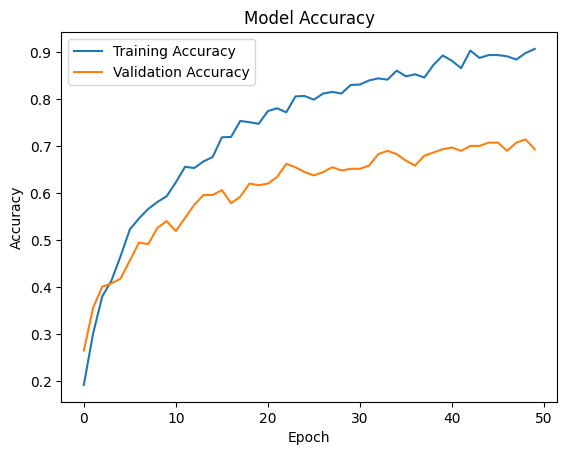

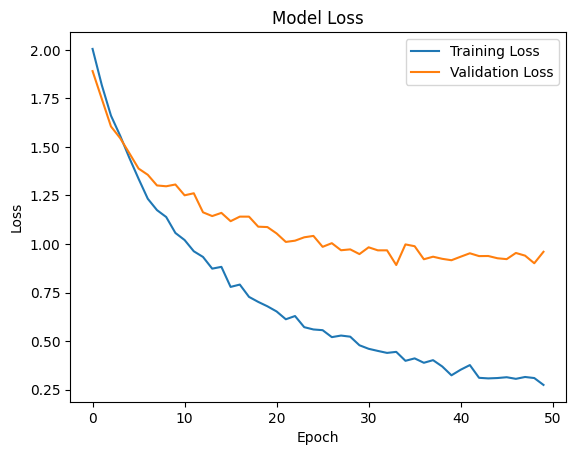

In [88]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [89]:
def test_model():
    model.evaluate(X_test, y_test)


In [90]:
model.evaluate(X_test, y_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6757 - loss: 1.0562 


[0.9599933624267578, 0.693379819393158]

In [91]:
import numpy as np
import pandas as pd

# --- Step 1: Verify feature length for all rows ---
df['length'] = df['features'].apply(lambda x: len(np.array(x).flatten()))
print("Feature length distribution:\n", df['length'].value_counts().head(10))

# --- Step 2: Keep only features within valid MFCC range (e.g., 35–45 values) ---
df = df[(df['length'] >= 35) & (df['length'] <= 45)].reset_index(drop=True)

print(f"✅ Filtered rows: {len(df)} remain")

# --- Step 3: Normalize feature vectors to fixed length (40) ---
def normalize_features(x, target_len=40):
    x = np.array(x).flatten()
    if len(x) > target_len:
        x = x[:target_len]  # truncate
    elif len(x) < target_len:
        x = np.pad(x, (0, target_len - len(x)))  # pad with zeros
    return x.astype(float)

df['features'] = df['features'].apply(normalize_features)

# --- Step 4: Convert to NumPy arrays safely ---
X = np.stack(df['features'].to_numpy())  # use np.stack (safer than vstack)
y = np.array(df['emotion'].tolist())

# --- Step 5: Verify final data shapes ---
print("✅ Final feature matrix shape:", X.shape)
print("✅ Final labels shape:", y.shape)

# --- Optional sanity check ---
print("First feature vector example:\n", X[0])
print("First label:", y[0])

Feature length distribution:
 length
40         1435
6918880       1
6278240       1
8136120       1
6662640       1
8392360       1
Name: count, dtype: int64
✅ Filtered rows: 1435 remain
✅ Final feature matrix shape: (1435, 40)
✅ Final labels shape: (1435,)
First feature vector example:
 [-7.24805788e+02  8.30596408e+01  8.63663358e-01  1.37157814e+01
  5.39352237e+00  1.53420705e+01 -3.89077162e+00  6.68270725e+00
 -9.10915382e+00 -2.31089421e+00 -7.55755401e+00 -2.66530739e+00
  4.40870061e+00  1.47856608e-01  1.09695122e+00 -1.24873181e-01
 -4.13643796e+00 -9.25571997e-02  1.53579970e+00 -1.96066442e+00
 -3.12094499e+00 -1.06653667e+00 -7.46158761e-01  2.24448179e+00
 -4.46180123e+00 -2.86920744e+00 -2.04713500e+00  8.05697229e-01
 -3.45850253e+00 -1.28351706e+00  7.80163976e-01 -1.39883048e+00
 -2.05389991e+00  4.73949070e-01 -1.07377910e+00 -7.79556387e-01
 -1.45366990e+00 -2.32587462e+00 -2.73089688e+00 -2.03872248e+00]
First label: calm


🚀 Training model...
✅ Training complete!

🎯 Model Accuracy: 68.29%

Classification Report:
               precision    recall  f1-score   support

       angry       0.81      0.77      0.79        39
        calm       0.67      0.82      0.74        38
     disgust       0.79      0.68      0.73        38
     fearful       0.72      0.68      0.70        38
       happy       0.62      0.63      0.62        38
     neutral       0.55      0.63      0.59        19
         sad       0.57      0.64      0.60        39
   surprised       0.73      0.58      0.65        38

    accuracy                           0.68       287
   macro avg       0.68      0.68      0.68       287
weighted avg       0.69      0.68      0.68       287



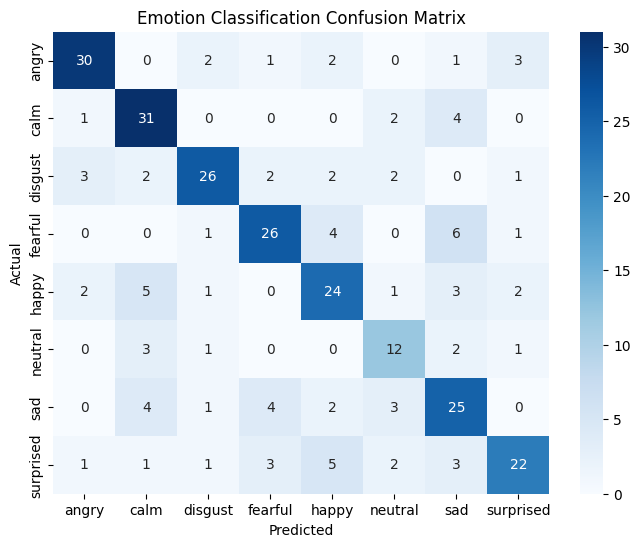

In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 4: Train MLP Classifier ---
model = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

print("🚀 Training model...")
model.fit(X_train, y_train)
print("✅ Training complete!")

# --- Step 5: Evaluate model ---
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# --- Step 6: Optional — Confusion Matrix ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Emotion Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [93]:
import joblib

# Save both model and scaler and label encoder
joblib.dump(model, "speech_emotion_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

print("✅ Model, Scaler, and Encoder saved successfully!")


✅ Model, Scaler, and Encoder saved successfully!


In [94]:
import librosa
import numpy as np
import joblib
import os

def extract_features_from_file(file_path):
    y, sr = librosa.load(file_path, duration=3, offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

# Example test file (replace with your own file path)
# Corrected the capitalization in the path
test_file = "/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-05-01-01-01-01.wav"

# Load saved model and scaler
model = joblib.load("speech_emotion_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.pkl")

# Extract features
features = extract_features_from_file(test_file)
features = scaler.transform([features])  # scale features

# Predict
prediction = model.predict(features)
emotion = le.inverse_transform(prediction)[0]

print(f"🎧 The predicted emotion is: **{emotion.upper()}**")

🎧 The predicted emotion is: **ANGRY**
